In [179]:
%matplotlib inline
import math
#from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

regression 했을 때 모델과 각 에러 값이 어떻게 다른지

# 실습 내용
- Evaluating predictive performance
- Judging classifier performance
- Judging ranking performance

# Evaluating predictive performance

##### Data import
- 모델 성능을 평가하는 내용으로 구체적인 데이터 설명, 모델 설명은 생략
- 여러가지 변수를 이용해 자동차의 가격을 예측하는 모델을 만들었을 때 그 모델의 성능을 어떻게 평가할 수 있는지를 다룰 것임

In [149]:
car_df = pd.read_csv('data/ToyotaCorolla.csv')
print(car_df.shape)
car_df.head()

(1436, 39)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


## Evaluation metrics
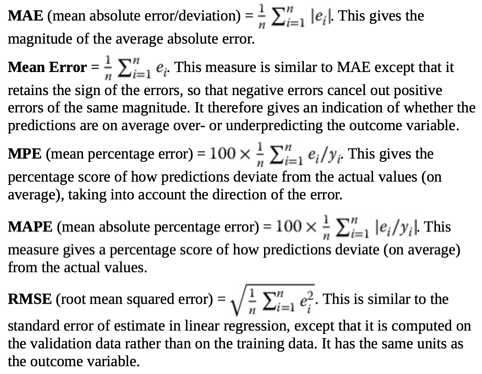

##### Q1) 각 evaluation metric의 계산 식을 완성하시오.

In [150]:
# y_true = [1, 2, 3], y_pred = [3, 4, 5]
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def ME(y_true, y_pred):
    return np.mean(y_true - y_pred)
def MPE(y_true, y_pred):
    for y in y_true:
        if y == 0:
            print('zero division is not possible')
            return
    return np.mean((y_true - y_pred) / y_true) * 100
def MAPE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))
def MSE(y_ture, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [151]:
y_true, y_pred = np.array([1, 2, 3]), np.array([3, 4, 5])
print('MAE: {}'.format(MAE(y_true, y_pred)))
print('ME: {}'.format(ME(y_true, y_pred)))
print('MPE: {}%'.format(MPE(y_true, y_pred)))
print('MAPE: {}%'.format(MAPE(y_true, y_pred)))
print('RMSE: {}'.format(RMSE(y_true, y_pred)))

MAE: 2.0
ME: -2.0
MPE: -122.22222222222221%
MAPE: 122.22222222222221%
RMSE: 2.0


##### 학습에 사용할 데이터를 만드시오.
- 이 실습에서는 predictor variables로 Price, Id, Model, Fuel_Type, Color를 사용하지 않음. 해당 column은 제외하고 X를 생성
- outcome은 Price로 하여 y를 생성
- train set: 60%, validation (test) set: 40%으로 분할

In [152]:
excludeCols = ('Price', 'Id', 'Model', 'Fuel_Type', 'Color')
predictors = [s for s in car_df.columns if s not in excludeCols]
outcome = 'Price'

X = car_df[predictors]
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y,
                                                      test_size=0.4, random_state=10)

##### 코드를 실행하여 아래와 같은 결과가 나오는지 비교하고, evaluation metric 계산식이 올바르게 작성되었는지 확인하시오

In [153]:
def regressionSummary(y_true, y_pred):
    print('Regression summary!!')
    print('ME {:.4f}'.format(ME(y_true, y_pred)))
    print('MAE {:.4f}'.format(MAE(y_true, y_pred)))
    print('MPE {}'.format(MPE(y_true, y_pred)))
    print('MAPE {}'.format(MAPE(y_true, y_pred)))
    print('RMSE {:.4f}'.format(RMSE(y_true, y_pred)))

In [154]:
# train linear regression model
reg = LinearRegression()
reg.fit(train_X, train_y)

# evaluate performance
# training
regressionSummary(train_y, reg.predict(train_X))
print('\n')
# validation 
regressionSummary(valid_y, reg.predict(valid_X))

Regression summary!!
ME -0.0000
MAE 792.9065
MPE -0.9227041720474292
MAPE 7.913053349411185
RMSE 1099.5484


Regression summary!!
ME 62.9150
MAE 885.6361
MPE -0.9178845179589779
MAPE 8.68113418781392
RMSE 1447.4992


ME, RMSE, MAE, MPE, MAPE 값의 의미 비교

##### Histogram과 boxplot을 이용하여 training set과 test set에서의 error(=residual) 분포 비교해보시오.

array([<AxesSubplot:title={'center':'residual'}>], dtype=object)

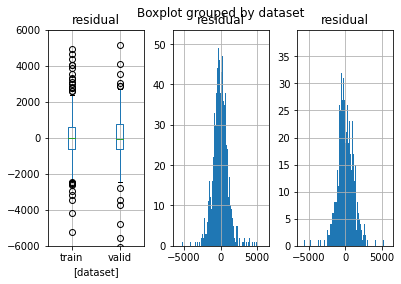

In [155]:
pred_error_train = pd.DataFrame({
    'residual': train_y - reg.predict(train_X),
    'dataset': 'train'
})
pred_error_valid = pd.DataFrame({
    'residual': valid_y - reg.predict(valid_X),
    'dataset': 'valid'
})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].set_ylim(-6000, 6000)
boxdata_df.boxplot(ax=axes[0], by='dataset')
pred_error_train.hist(ax=axes[1], bins=100, range=[-6000, 6000])
pred_error_valid.hist(ax=axes[2], bins=100, range=[-6000, 6000])
#fig.set_size(20, 8)
#pred_error_train.hist()

# Judging classifier performance

## Confusion matrix
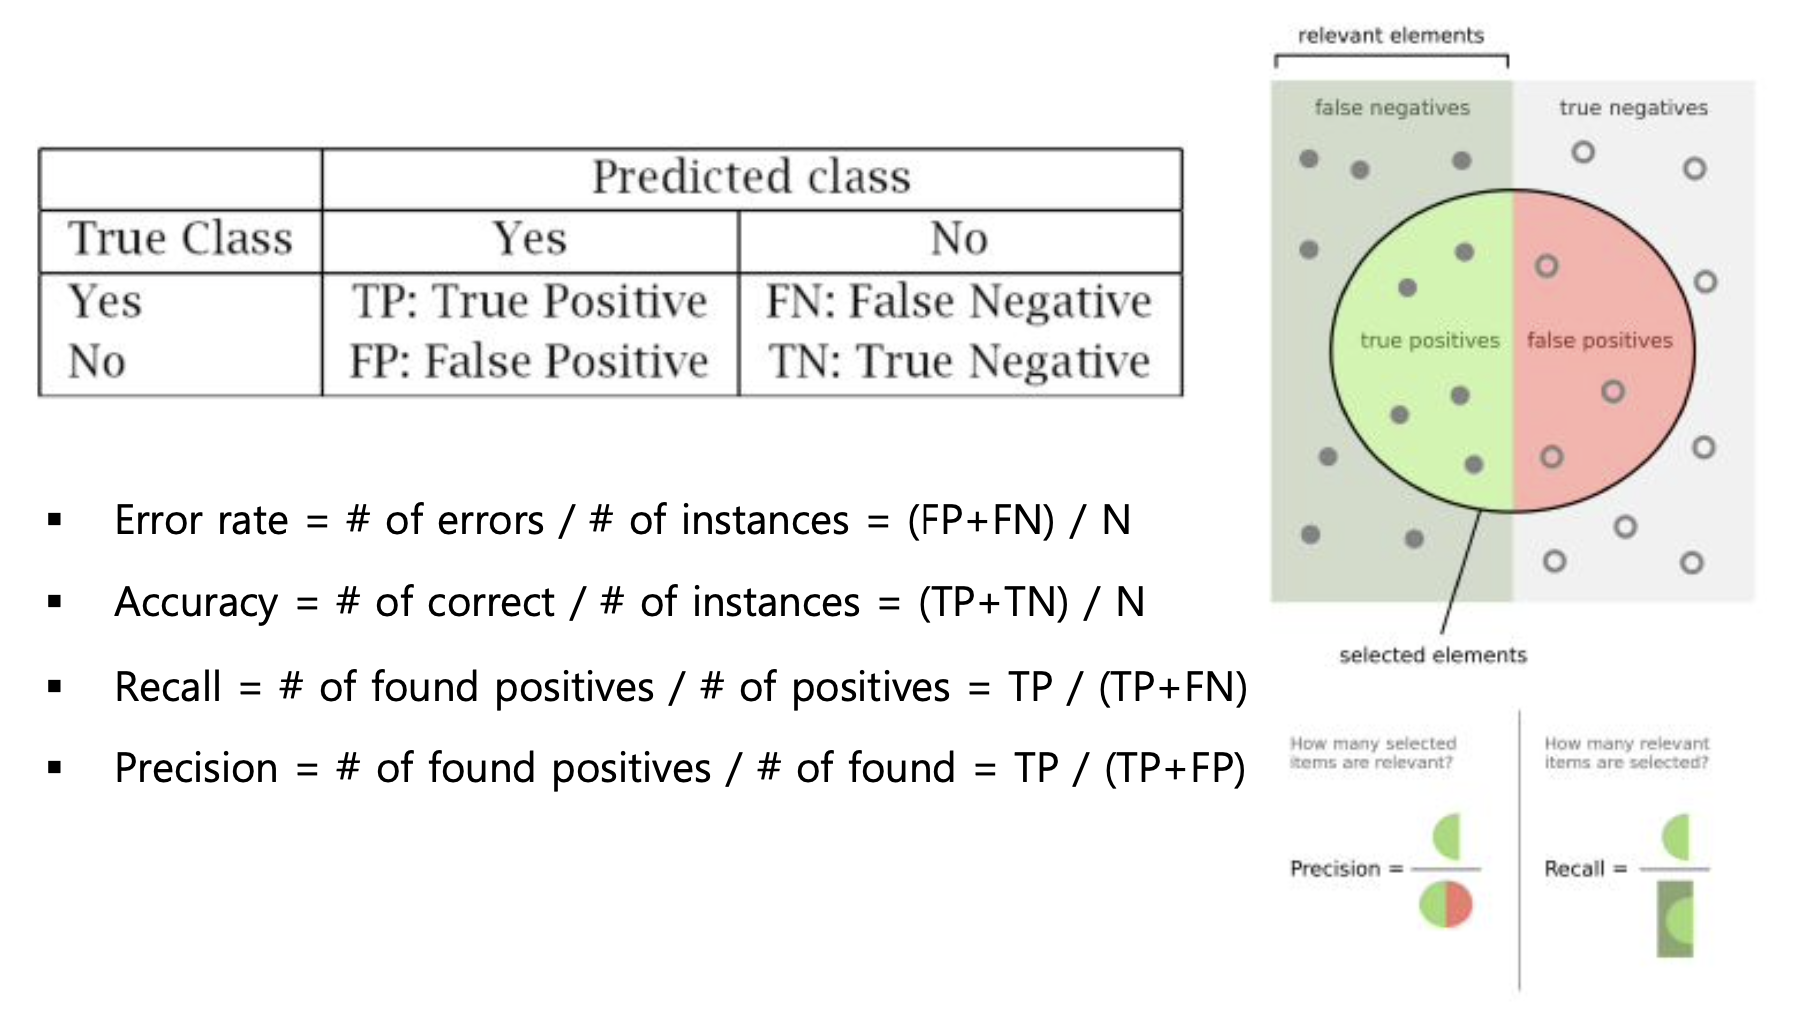
(recall = sensitivity, precision = specificity)

##### Data import
- 이미 학습을 완료하여 얻은 실제 class 값 (owner or nonowner)와, 모델을 학습해서 구한 owner일 확률 값으로 구성된 데이터

In [156]:
owner_df = pd.read_csv('data/ownerExample.csv')
print(owner_df.shape)

(24, 2)


In [157]:
'owner', 'nonowner'

('owner', 'nonowner')

##### Q2) Probability > 0.5 이면 owner라고 분류하는 모델이라고 했을 때, 위의 owner_df에 class 예측 값을 나타내는 Class_predicted 컬럼을 추가하시오

In [158]:
owner_df['Class_predicted'] = owner_df.Probability.apply(
    lambda x: 'owner' if x > 0.5 else 'nonowner')

## Explore sklearn confusion matrix
참고: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

##### confusion matrix 모듈 임포트

In [159]:
from sklearn.metrics import confusion_matrix

##### sklearn를 이용하여 confusion matrix 구하기

In [160]:
confusion_matrix(owner_df.Class, owner_df.Class_predicted, labels=['owner', 'nonowner'])

array([[11,  1],
       [ 2, 10]])

## Confusion matrix for different cutoffs
- 분류 문제일 경우 보통 0.5를 기준으로 그룹을 구분하는데, 상황에 따라 0.5를 기준으로 하는 것이 가장 좋은 것이 아닐 수 있음
- cutoff를 달리하며 confusion matrix를 생성하고, 각 상황에서의 error rate, accuracy 값 등을 비교해 가장 좋은 cutoff를 선택할 수 있음

##### cutoff를 0.25, 0.5, 0.7로 할 때 각각 예측 클래스 값을 구한 dataframe을 만들고, owner_diff_cutoffs 리스트에 dataframe을 저장하시오.

In [161]:
cut_off_list = [0.25, 0.5, 0.7]
for i in range(len(cut_off_list)):
    owner_df['Class_predicted_{}'.format(cut_off_list[i])] = \
    owner_df.Probability.apply(
    lambda x: 'owner' if x > cut_off_list[i] else 'nonowner')

In [162]:
owner_df.head(2)

,Class,Probability,Class_predicted,Class_predicted_0.25,Class_predicted_0.5,Class_predicted_0.7
0,owner,0.9959,owner,owner,owner,owner
1,owner,0.9875,owner,owner,owner,owner


In [163]:
print(confusion_matrix(owner_df.Class, owner_df['Class_predicted_0.25'], \
                       labels=['owner', 'nonowner']))
print(confusion_matrix(owner_df.Class, owner_df['Class_predicted_0.5'], labels=['owner', 'nonowner']))
print(confusion_matrix(owner_df.Class, owner_df['Class_predicted_0.7'], labels=['owner', 'nonowner']))

[[11  1]
 [ 4  8]]
[[11  1]
 [ 2 10]]
[[ 8  4]
 [ 1 11]]


##### cutoff에 따라 confusion matrix 값이 어떻게 다르게 나오는지 확인해보시오.

## ROC curve
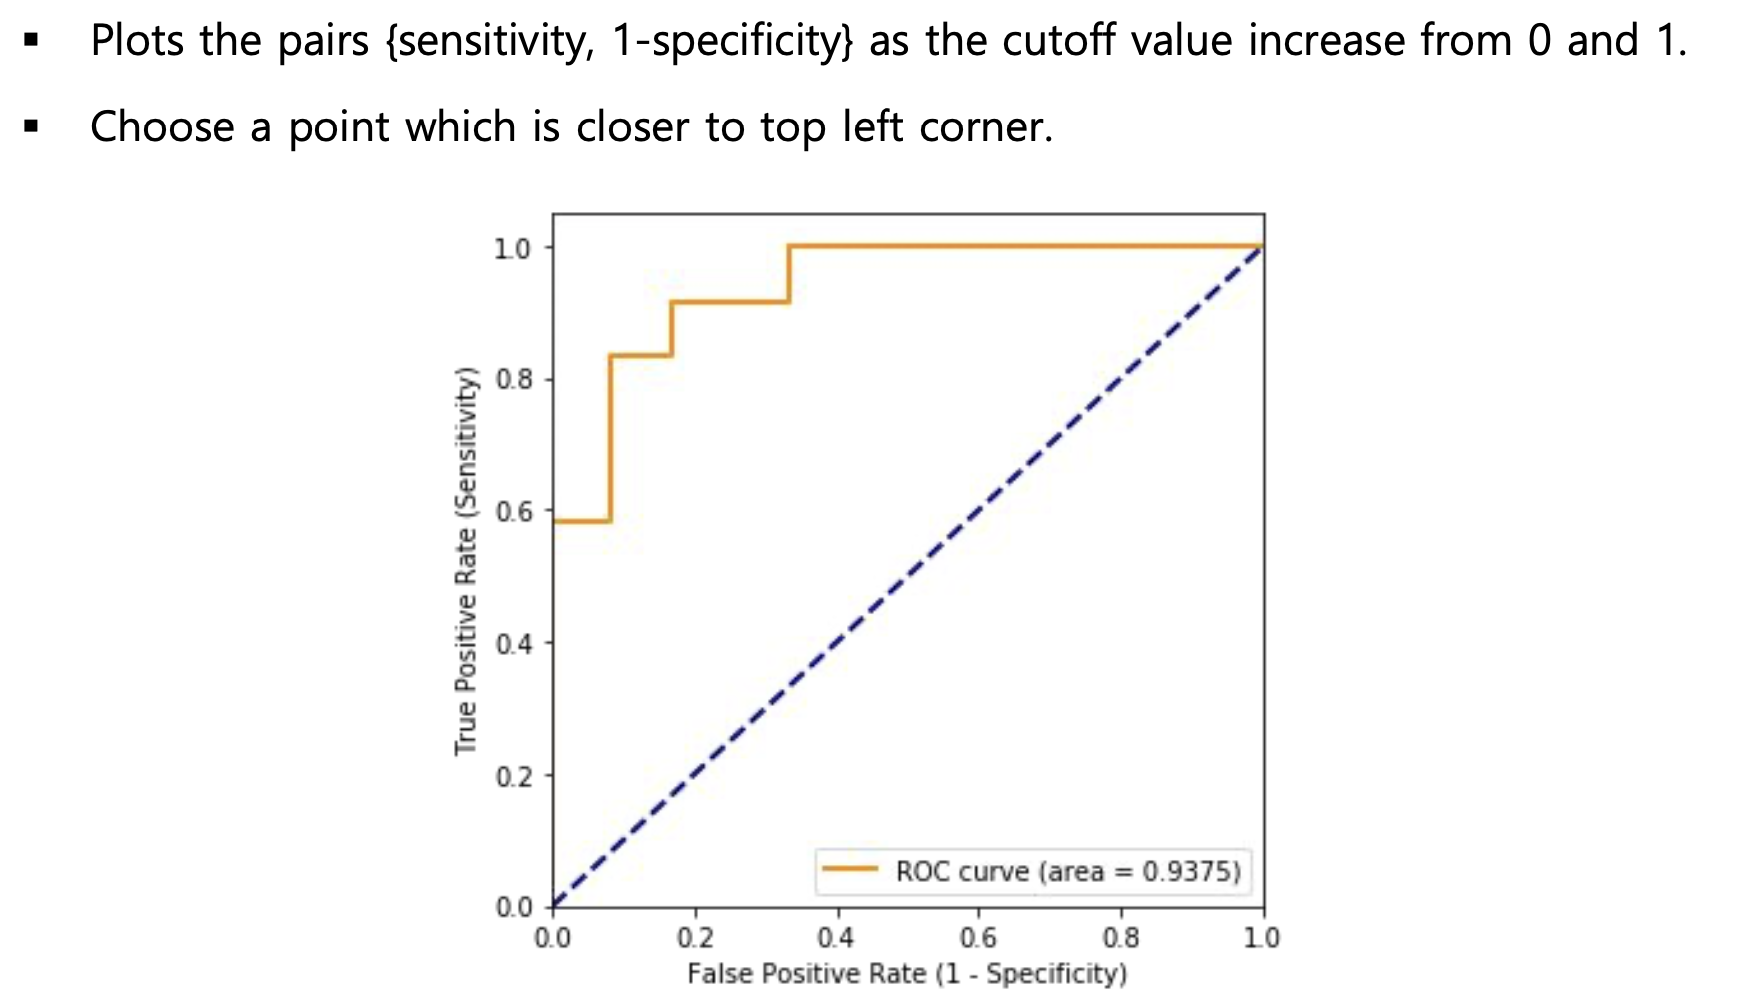

## Explore sklearn ROC curve, AUC
참고 <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

##### ROC curve, AUC 모듈 임포트

In [164]:
from sklearn.metrics import roc_curve, auc

##### sklearn를 이용하여 ROC curve, AUC 구하기

In [165]:
fpr, tpr, threshold = roc_curve(owner_df.Class, owner_df.Probability, pos_label="owner")
roc_auc = auc(fpr, tpr)

print("ROC curve 정보:")
print(" ", fpr)
print(" ", tpr)
print(" ", threshold)

print("\nAUC")
print(" ", roc_auc)

ROC curve 정보:
  [0.         0.         0.         0.08333333 0.08333333 0.16666667
 0.16666667 0.33333333 0.33333333 1.        ]
  [0.         0.08333333 0.58333333 0.58333333 0.83333333 0.83333333
 0.91666667 0.91666667 1.         1.        ]
  [1.9959 0.9959 0.8476 0.7628 0.6563 0.6224 0.5055 0.3371 0.2179 0.0031]

AUC
  0.9375


fpr, tpr, threshold 각각 의미가 뭔지 설명해주기, sklearn에 roc_auc_score라는 모듈도 있는데 참고

##### ROC curve 그리기

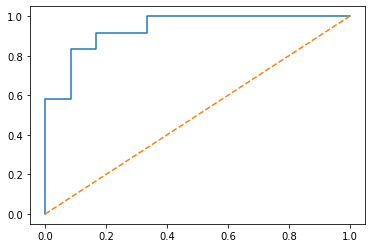

AUC: 0.9375


In [166]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
print('AUC: {}'.format(roc_auc))

##### 기타 다양한 sklearn의 performance measures
참고: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

# Judging ranking performance

In [167]:
ex2_df

,index,Customer name,Height,Age,Actual Response,Prob,CumPosRes
0,6,Alex,65,12,Y,0.88,1
1,12,Amy,69,13,N,0.87,1
2,4,Hilary,67,19,Y,0.81,2
3,10,Philip,75,20,Y,0.80,3
4,1,Bob,72,21,Y,0.79,4
5,11,Catherine,70,23,N,0.77,4
6,17,Nancy,64,24,Y,0.76,5
7,2,Jessica,65,25,Y,0.75,6
8,15,Preston,68,25,N,0.75,6
9,19,Laura,62,29,Y,0.71,7


## Lift Chart & Cumulative gains chart
- Lift: 예측 모델을 사용했을 때와 예측 모델 없이 예측했을 때(= 랜덤하게 예측) 때의 성능을 비교하는 값
- Cumulative gains chart와 lift chart가 lift를 평가하는 시각적인 도구로 활용됨
- Cumulative gains chart와 lift chart 모두 lift curve와 baseline으로 구성됨 -> 확인 필요
- Lift curve와 baseline 사이의 면적이 클수록 모델의 성능이 좋다고 판단할 수 있음
- 참고: http://www2.cs.uregina.ca/~dbd/cs831/notes/lift_chart/lift_chart.html

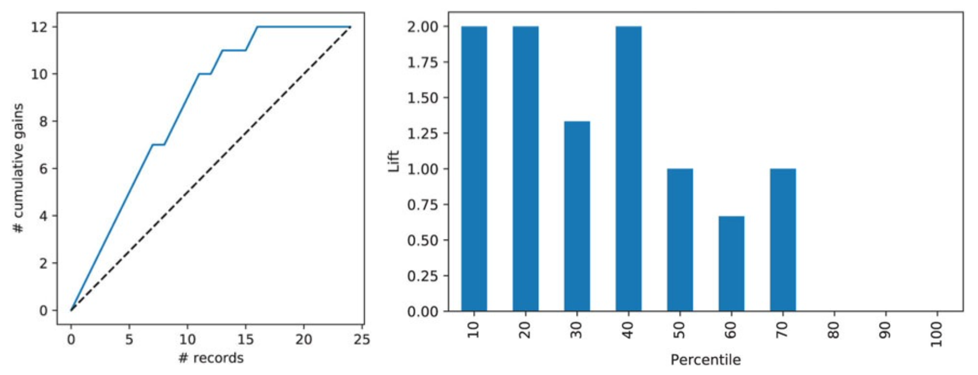

### 예시를 통한 lift chart, cumulative gains chart 그려보기
- Data: 고객 정보, 응답 여부
- 고객 정보를 이용하여 응답 여부를 예측하고자 함
- 응답 확률 예측 모델을 $p(x)=100-age(x)$로 하고, 확률이 50이상이면 응답할 것이라고 예측하는 모델을 lift chart, cumulative gains chart을 통해 평가
- lift chart, cumulative gains chart는 구현되어 있는 함수가 없어 실습을 통해 직접 그려보고자 함

##### Data

In [186]:
ex2_df = pd.DataFrame({"Customer name": ["Alan", "Bob", "Jessica", "Elizabeth", "Hilary", 
                                           "Fred", "Alex", "Margot", "Sean", "Chris", 
                                           "Philip", "Catherine", "Amy", "Erin", "Trent", 
                                           "Preston", "John", "Nancy", "Kim", "Laura"], 
                         "Height": [70, 72, 65, 62, 67, 
                                    69, 65, 63, 71, 73, 
                                    75, 70, 69, 68, 72, 
                                    68, 64, 64, 72, 62], 
                         "Age": [39, 21, 25, 30, 19, 
                                 48, 12, 51, 65, 42, 
                                 20, 23, 13, 35, 55, 
                                 25, 76, 24, 31, 29], 
                         "Actual Response": ["N", "Y", "Y", "Y", "Y", 
                                             "N", "Y", "N", "Y", "N", 
                                             "Y", "N", "N", "Y", "N", 
                                             "N", "N", "Y", "N", "Y"]})
ex2_df

,Customer name,Height,Age,Actual Response
0,Alan,70,39,N
1,Bob,72,21,Y
2,Jessica,65,25,Y
3,Elizabeth,62,30,Y
4,Hilary,67,19,Y
5,Fred,69,48,N
6,Alex,65,12,Y
7,Margot,63,51,N
8,Sean,71,65,Y
9,Chris,73,42,N


##### 고객이 응답할 확률을 구하고, Chart를 그리기 위하여 필요한 형태로 sorting 하여라

In [187]:
ex2_df['Prob'] = (100 - ex2_df['Age']) / 100

In [188]:
ex2_df = ex2_df.sort_values(by='Prob', ascending=False)

##### 누적 응답 수를 구하여라

In [189]:
ex2_df["Cumulative positive responses"] = ex2_df["Actual Response"].map({"Y": 1, "N": 0}).cumsum() ### Write code
ex2_df

,Customer name,Height,Age,Actual Response,Prob,Cumulative positive responses
6,Alex,65,12,Y,0.88,1
12,Amy,69,13,N,0.87,1
4,Hilary,67,19,Y,0.81,2
10,Philip,75,20,Y,0.80,3
1,Bob,72,21,Y,0.79,4
11,Catherine,70,23,N,0.77,4
17,Nancy,64,24,Y,0.76,5
2,Jessica,65,25,Y,0.75,6
15,Preston,68,25,N,0.75,6
19,Laura,62,29,Y,0.71,7


##### 10 percentile 단위로 접촉한 누적 고객 수, 그 때의 누적 응답 수를 구하여라

In [192]:
ex2_df = ex2_df.reset_index()

In [193]:
customers_cum = [(i+1)*2 for i in range(10)] ### Write code
responses_cum = ex2_df.loc[[i*2+1 for i in range(10)], \
                           "Cumulative positive responses"] ### Write code

lift_ex2 = pd.DataFrame({"Total customers contacted": customers_cum, 
                         "Cumulative positive responses": responses_cum})
lift_ex2

,Total customers contacted,Cumulative positive responses
1,2,1
3,4,3
5,6,4
7,8,6
9,10,7
11,12,8
13,14,9
15,16,9
17,18,9
19,20,10


##### 위의 표를 이용하여 cumulative gains chart와 lift chart를 완성하여라

In [198]:
lift_ex2["Cumulative positive responses"].values / list(range(1, 11))

array([1.        , 1.5       , 1.33333333, 1.5       , 1.4       ,
       1.33333333, 1.28571429, 1.125     , 1.        , 1.        ])

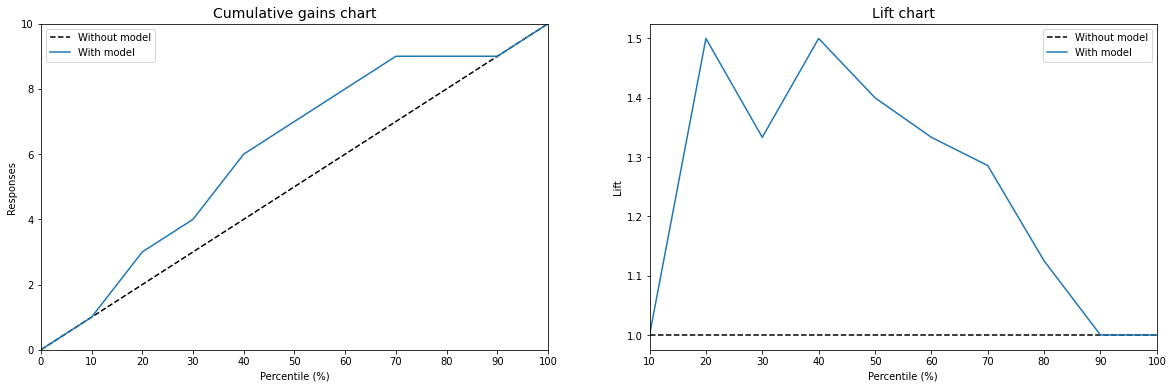

In [197]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

## 첫줄 마지막줄 빼고 그냥 그래프 그리는 칸 완전 다 비워두고 알아서 코드 짜라고 하기
## Cumulative gains chart
axes[0].plot([0, 10], [0, 10], linestyle='--', color='k', label="Without model")
axes[0].plot(range(11), [0] + list(lift_ex2["Cumulative positive responses"]), \
             label="With model") ### Write code y 값만
axes[0].set_xticks(range(11))
axes[0].set_xticklabels([i*10 for i in range(11)])
axes[0].set_xlabel("Percentile (%)")
axes[0].set_ylabel("Responses")
axes[0].set_title("Cumulative gains chart", fontsize=14)
axes[0].margins(x=0, y=0)
axes[0].legend()

## Lift chart
axes[1].plot([0, 9], [1, 1], linestyle='--', color='k', label="Without model")
### Write code y 값만
axes[1].plot(range(10), lift_ex2["Cumulative positive responses"].values \
             / list(range(1, 11)), label="With model") 
axes[1].set_xticks(range(10))
axes[1].set_xticklabels([(i+1)*10 for i in range(10)])
axes[1].set_xlabel("Percentile (%)")
axes[1].set_ylabel("Lift")
axes[1].set_title("Lift chart", fontsize=14)
axes[1].margins(x=0)
axes[1].legend()
plt.show()

##### 아래는 만약 응답을 할 고객을 완벽하게 분류할 수 있는 모델일 경우의 gain chart와 lift chart이다. 비교해보자.

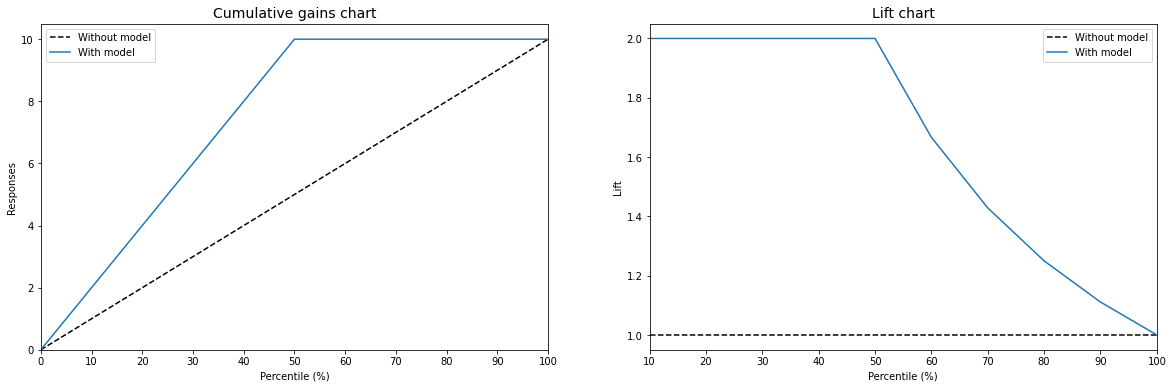

In [199]:
# chart 그리기 위한 표 구하기
customers_cum = [(i+1)*2 for i in range(10)]
responses_cum = [2, 4, 6, 8, 10, 10, 10, 10, 10, 10] ### Write code
lift_ex2_ideal = pd.DataFrame({"Total customers contacted": customers_cum, 
                               "Cumulative positive responses": responses_cum})

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

## Cumulative gains chart
axes[0].plot([0, 10], [0, 10], linestyle='--', color='k', label="Without model")
axes[0].plot(range(11), [0] + list(lift_ex2_ideal["Cumulative positive responses"]), label="With model") ### Write code y 값만
axes[0].set_xticks(range(11))
axes[0].set_xticklabels([i*10 for i in range(11)])
axes[0].set_xlabel("Percentile (%)")
axes[0].set_ylabel("Responses")
axes[0].set_ylim([0, 10.5])
axes[0].set_title("Cumulative gains chart", fontsize=14)
axes[0].margins(x=0, y=0)
axes[0].legend()

## Lift chart
axes[1].plot([0, 9], [1, 1], linestyle='--', color='k', label="Without model")
### Write code y 값만
axes[1].plot(range(10), lift_ex2_ideal["Cumulative positive responses"].values / list(range(1, 11)), label="With model") 
axes[1].set_xticks(range(10))
axes[1].set_xticklabels([(i+1)*10 for i in range(10)])
axes[1].set_xlabel("Percentile (%)")
axes[1].set_ylabel("Lift")
axes[1].set_title("Lift chart", fontsize=14)
axes[1].margins(x=0)
axes[1].legend()
plt.show()